In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra) 
library(grid)
library(RColorBrewer)
library(factoextra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


# Introduction

This data was obtained from the FANTOM CAGE data from three donors whose macrophages were treated with LPS (http://fantom.gsc.riken.jp/5/sstar/Macrophage_response_to_LPS). 


# LPS Time Series Analysis with TFEA

## Methods


We filtered out all but those TFs with at least two significant time points from the TFEA output and applied clustering to the remainder. Clustering of the time series data was performed on the first two hours in order to distinguish the various early responses to LPS infection.

K-means clustering was done using the Hartigan and Wong algorithm with 25 random starts and 10 iterations for $k = 3$ \cite{hartigan1979algorithm}. The optimal number of clusters was selected using the within-sum-of-squares metric and silhouette method, both giving the same $k=3$.


## Load in the data


In [2]:
tfea_files = list.files(path='/Users/rusi2317/projects/tfea/fantom_lps/data/Macrophage_LPS_FANTOM_TFEA', 
                     pattern='*TFEA.txt', full.names=TRUE)

#read txt files
tfea_txt = lapply(tfea_files, read.delim) 

In [3]:
names(tfea_txt) <- lapply(strsplit(tfea_files, '/'), `[`, 9)
file_names <- lapply(strsplit(tfea_files, '/'), `[`, 9)

## Functions

In [4]:
get_dataframes <- function(df, dfnames){
    
    ##identify the samples
    id <- as.character(dfnames)
    
    #select TF, AUC and pvalue columns
    newdf <- as.data.frame(df)[c(1,2,6,7)]
    
    colnames(newdf) <- c(paste0('Escore-',id),paste0('corrEscore-',id), 
                                paste0('pval-',id),paste0('corrpval-',id))
    
    newdf$TF <- rownames(newdf)
    
    #return the new data.frame with TF, pval and AUC
    return(newdf)   
    
}

In [5]:
get_EScores <- function(df, dfnames){
    
    ##sample names?
    id <- as.character(dfnames)
    
    #select TF, AUC and pvalue columns
    newdf <- as.data.frame(df)[c(2)]
    
    colnames(newdf) <- c(paste0('Escore-',id))#,paste0('corrEscore-',id))
    newdf$TF <- rownames(newdf)
    
    #return the new data.frame with Escores
    return(newdf)   
    
}

In [6]:
get_pval <- function(df, dfnames){
    
    ##tfiles
    id <- as.character(dfnames)
    #print(id)
    
    
    #select TF, AUC and pvalue columns
    newdf <- as.data.frame(df)[c(7)] 
    
    colnames(newdf) <- c(paste0('pval-',id))#,paste0('corrpval-',id))
    newdf$TF <- rownames(newdf)
    
    #return the new data.frame with p-values only
    return(newdf)   
    
}

In [7]:
Nlist <- length(tfea_txt)
tfea_res <- list() 
tfea_auc <- list()
tfea_pvl <- list()

for(i in 1:Nlist){
    
    ##filter the AUC and p-values
    tfea <- get_dataframes(df=as.data.frame(tfea_txt[i]), dfnames=file_names[i])
    auc <- get_EScores(df=as.data.frame(tfea_txt[i]), dfnames=file_names[i])
    pval <- get_pval(df=as.data.frame(tfea_txt[i]), dfnames=file_names[i])
    
    tfea_res[[i]] <- tfea
    tfea_auc[[i]] <- auc
    tfea_pvl[[i]] <- pval
     
}

In [8]:
##merge all the data sets base on the time series
tfea_res_df <- Reduce(function(...) merge(...,by="TF", all=T), tfea_res)
tfea_auc_df <- Reduce(function(...) merge(...,by="TF", all=T), tfea_auc)
tfea_pvl_df <- Reduce(function(...) merge(...,by="TF", all=T), tfea_pvl) 

In [9]:
head(tfea_res_df, 3)

TF,Escore-00hr00mindonor1_02hr30mindonor1_TFEA.txt,corrEscore-00hr00mindonor1_02hr30mindonor1_TFEA.txt,pval-00hr00mindonor1_02hr30mindonor1_TFEA.txt,corrpval-00hr00mindonor1_02hr30mindonor1_TFEA.txt,Escore-00hr00mindonor1_03hr00mindonor1_TFEA.txt,corrEscore-00hr00mindonor1_03hr00mindonor1_TFEA.txt,pval-00hr00mindonor1_03hr00mindonor1_TFEA.txt,corrpval-00hr00mindonor1_03hr00mindonor1_TFEA.txt,Escore-00hr00mindonor1_05hrdonor1_TFEA.txt,⋯,pval-00hr00mindonor3_22hrdonor3_TFEA.txt,corrpval-00hr00mindonor3_22hrdonor3_TFEA.txt,Escore-00hr00mindonor3_24hrdonor3_TFEA.txt,corrEscore-00hr00mindonor3_24hrdonor3_TFEA.txt,pval-00hr00mindonor3_24hrdonor3_TFEA.txt,corrpval-00hr00mindonor3_24hrdonor3_TFEA.txt,Escore-00hr00mindonor3_36hrdonor3_TFEA.txt,corrEscore-00hr00mindonor3_36hrdonor3_TFEA.txt,pval-00hr00mindonor3_36hrdonor3_TFEA.txt,corrpval-00hr00mindonor3_36hrdonor3_TFEA.txt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AHR_HUMAN.H11MO.0.B,0.00000000,0.00000000,1,1,0.00000000,0.000000000,1,1,0.000000000,⋯,1,1,0.00000000,0.00000000,1,1,0.00000000,0.00000000,1,1
AIRE_HUMAN.H11MO.0.C,-0.02251677,-0.02180874,1,1,0.04003320,0.023602346,1,1,0.005427241,⋯,1,1,0.02386130,0.00601205,1,1,-0.02895965,-0.04000745,1,1
ALX1_HUMAN.H11MO.0.B,0.01322962,0.01338306,1,1,0.04379568,0.004267389,1,1,-0.035384627,⋯,1,1,0.01640691,-0.01787142,1,1,0.03051671,0.01841447,1,1


## Analyzing a shorter time series

### Subsetting the data by donors

The data was filtered by the specific donor such that donor1, donor2 and donor3 had their own dataframe.  

In this section the data was filtered first by p-value, then followed looking only at the first 5 hours of the time series. This is an attempt to concentrate at the early time-points of the time-series as a way to separate early vs late immune response.

In [10]:
##subset e-score datasets by donors
lps_auc_donor1 <- tfea_auc_df[,colnames(tfea_auc_df) %in% grep("donor1", colnames(tfea_auc_df),perl=TRUE, value=TRUE)]
lps_auc_donor2 <- tfea_auc_df[,colnames(tfea_auc_df) %in% grep("donor2", colnames(tfea_auc_df),perl=TRUE, value=TRUE)]
lps_auc_donor3 <- tfea_auc_df[,colnames(tfea_auc_df) %in% grep("donor3", colnames(tfea_auc_df),perl=TRUE, value=TRUE)]

#assign rownames at TFs
rownames(lps_auc_donor1) <- as.character(tfea_auc_df[,c(1)])
rownames(lps_auc_donor2) <- as.character(tfea_auc_df[,c(1)])
rownames(lps_auc_donor3) <- as.character(tfea_auc_df[,c(1)])

In [11]:
##subset p-value datasets by donors 
lps_pval_donor1 <- tfea_pvl_df[,colnames(tfea_pvl_df) %in% grep("donor1", colnames(tfea_pvl_df),perl=TRUE, value=TRUE)]
lps_pval_donor2 <- tfea_pvl_df[,colnames(tfea_pvl_df) %in% grep("donor2", colnames(tfea_pvl_df),perl=TRUE, value=TRUE)]
lps_pval_donor3 <- tfea_pvl_df[,colnames(tfea_pvl_df) %in% grep("donor3", colnames(tfea_pvl_df),perl=TRUE, value=TRUE)]

#assign rownames at TFs
rownames(lps_pval_donor1) <- as.character(tfea_pvl_df[,c(1)])
rownames(lps_pval_donor2) <- as.character(tfea_pvl_df[,c(1)])
rownames(lps_pval_donor3) <- as.character(tfea_pvl_df[,c(1)])

Further analyses were done on donor2 and donor3 since donor1 had close to half the time points.

### Donor 2


- Transcription factors with at least a two time-point with p-value <= 1e-06 were selected for the cluster analysis.

    - Of 401 TFs in the HOCOMOCO database, 31 had at least 2 significant time points.
    
- The first eleven time points were analyzed.


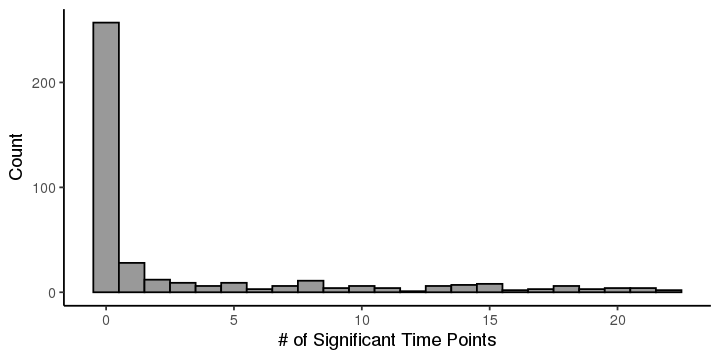

In [12]:
options(repr.plot.width=6, repr.plot.height=3)

significanceTFs <- as.data.frame(rowSums(lps_pval_donor2 <= 0.1))
colnames(significanceTFs) <- 'signif_times'

ggplot(significanceTFs, aes(signif_times)) + 
geom_histogram(binwidth=1, color = 'black', fill='gray60') + theme_classic() +
xlab('# of Significant Time Points') + ylab('Count')

In [13]:
## get TFs (rows) with more than 1 significant EScore
lps_pval_donor2_sig <- lps_pval_donor2[rowSums(lps_pval_donor2 <= 0.1) > 14, ] 
lps_auc_donor2_short <- lps_auc_donor2[rownames(lps_auc_donor2) %in% rownames(lps_pval_donor2_sig) , 1:6]
dim(lps_pval_donor2_sig)

[1] 32 22

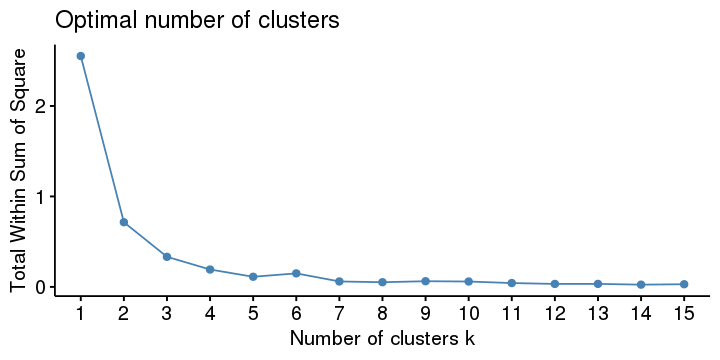

In [14]:
options(repr.plot.width=6, repr.plot.height=3)

donor2short <- fviz_nbclust(lps_auc_donor2_short, 
                      kmeans, 
                      method = "wss",
                      k.max = 15, nboot = 100,
                      verbose = TRUE)
donor2short

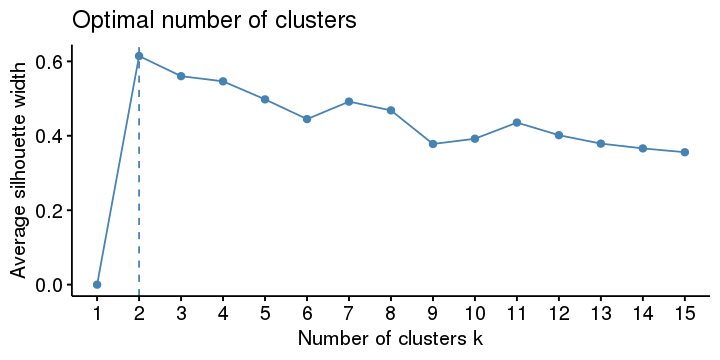

In [16]:
fviz_nbclust(lps_auc_donor2_short, 
              kmeans, 
              method = 'silhouette', 
              k.max = 15, nboot = 100, 
              verbose = TRUE) 

In [17]:
restructure_df <- function(df, cols, levels){
    
    df <- df[-ncol(df)]
    df$TF <- rownames(df)
    colnames(df) <- cols
    
    df_gather <- df %>% gather("key","val", setdiff(names(.), "TF"))
    
    ##specify the factors for ordering the variables
    df_gather$keys <- factor(df_gather$key,
                           levels=levels)
    return(df_gather)
}


In [18]:
plot_tfea_auc <- function(df, main, cols, levels, breaks, labels, colour_main, colour_minor){
    
    df_gather <- restructure_df(df, cols, levels )
    
    ########################################################
    ########Now plotting the clusters as line plots#########
    ########################################################

    df_line <- ggplot(data=df_gather, aes(x=keys, y=val, group=TF)) +
                        geom_line(linetype = "dotted",size=0.25, colour=colour_minor, alpha=0.75)+  
                        geom_point(size=0.05, colour=colour_minor, alpha=0.95)+ 
                        labs(title = main,
                             x = " ", y = "Corrected E-Score") + 
                        theme_classic() + 
                        scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                        scale_x_discrete(limit=breaks,
                                         labels=labels,
                                         expand=c(0.01, 0.01))+
                        theme(plot.title = element_text(hjust = 0.5),
                              title = element_text(size = 16, face = "bold"), 
                              axis.title = element_text(size = 14), 
                              axis.text = element_text(size = 12),
                              axis.text.x = element_text(size = 12, angle = 90, 
                                                         hjust = 0.5, vjust = 0.5)) +
                        stat_summary(fun.y=mean,geom="line",lwd=0.7,
                                     aes(group=1), colour=colour_main) ##542788

    df_line
}

In [19]:
clustering_by_auc <- function(data_input, clusters=6){
    
    set.seed(123)
    control_k <- kmeans(data_input, centers = clusters, nstart = 25)
    data_input$cluster <- control_k$cluster

    return(data_input)
}

In [20]:
plotting_clusters_short <- function(cluster_df_list, main_main, 
                              cols, levels, breaks, labels,
                              colour_main, colour_minor){
    
    control_df <- cluster_df_list

    ##control
    c.c1 <- subset(control_df, cluster == 1 )
    c.c2 <- subset(control_df, cluster == 2 )
    c.c3 <- subset(control_df, cluster == 3 )

    
    ##line plot for all
    options(repr.plot.width=12, repr.plot.height=5)

    grid.arrange(plot_tfea_auc(c.c1, "Cluster 1", cols, levels, 
                               breaks, labels, colour_main, colour_minor), 
                 plot_tfea_auc(c.c2, "Cluster 2", cols, levels, 
                               breaks, labels, colour_main, colour_minor), 
                 plot_tfea_auc(c.c3, "Cluster 3", cols, levels,
                               breaks, labels, colour_main, colour_minor),
                 top = textGrob(main_main,
                                gp=gpar(fontsize=15,font=3)),
                 nrow = 1)
}

In [22]:
lps_auc_donor2_short_cluster <- clustering_by_auc(lps_auc_donor2_short,clusters = 3)


In [23]:
##create brakes for donor2
colname_days2short2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                   "T0_1hr20min","T0_2hr00min",
                         "TF")

level_days2short2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","T0_2hr00min")

plot_limits2short2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","T0_2hr00min")


plot_labels2short2 <- c("T0 vs 0hr15min","T0 vs 0hr30min","T0 vs 0hr45min","T0 vs 1hr00min",
                 "T0 vs 1hr20min", "T0 vs 2hr00min") 

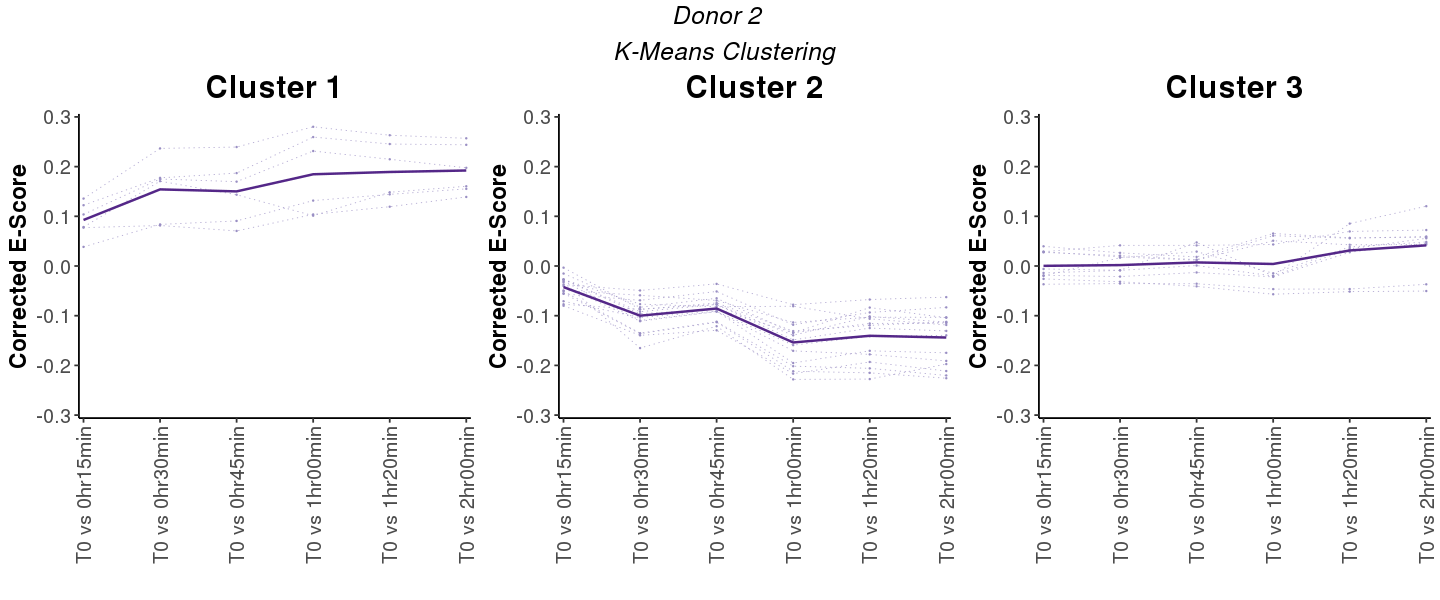

In [24]:
plotting_clusters_short(lps_auc_donor2_short_cluster,
                        "Donor 2 \n K-Means Clustering",
                       colname_days2short2,
                        level_days2short2,
                        plot_limits2short2,
                        plot_labels2short2,
                        "#542788","#998ec3")

### Add T0 to the clusters

In [25]:
T0_lps_auc_donor2_short_cluster2 <- data.frame(T0 =(rep(0, nrow(lps_auc_donor2_short_cluster))),
                                              lps_auc_donor2_short_cluster)

In [26]:
##create brakes for donor2
colname_final_plot <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                        "T0_1hr20min","T0_2hr00min","TF")

level_final_plot <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                      "T0_1hr20min","space1","space2","T0_2hr00min")

limits_final_plot <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                       "T0_1hr20min","space1","space2","T0_2hr00min")

labels_final_plot <- c("0","0.25","0.50","0.75",
                       "1.00", "1.30"," ", " ", "2.00")

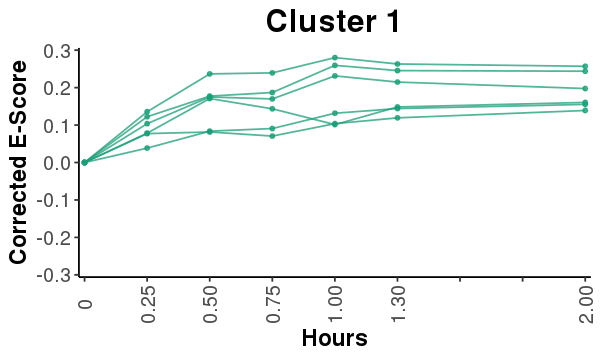

In [27]:
options(repr.plot.width=5, repr.plot.height=3)
df_gather1 <- restructure_df(subset(T0_lps_auc_donor2_short_cluster2, cluster == 1),
                             colname_final_plot , level_final_plot)

    
########################################################
########Now plotting the clusters as line plots#########
########################################################

cluster_plt1 <- ggplot(data=df_gather1, aes(x=keys, y=(val), group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#1B9E77', alpha=0.75)+  
                    geom_point(size=1, colour='#1B9E77', alpha=0.79)+ 
                    labs(title = "Cluster 1",
                         x = "Hours", y = "Corrected E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=limits_final_plot,
                                     labels=labels_final_plot,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

cluster_plt1

In [28]:
subset(lps_auc_donor2_short_cluster, cluster == 1)

,Escore-00hr00mindonor2_00hr15mindonor2_TFEA.txt,Escore-00hr00mindonor2_00hr30mindonor2_TFEA.txt,Escore-00hr00mindonor2_00hr45mindonor2_TFEA.txt,Escore-00hr00mindonor2_01hr00mindonor2_TFEA.txt,Escore-00hr00mindonor2_01hr20mindonor2_TFEA.txt,Escore-00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
NFKB1_HUMAN.H11MO.1.B,0.12231892,0.17734398,0.18691303,0.2594630,0.2454513,0.2438506,1
NFKB2_HUMAN.H11MO.0.B,0.07717266,0.08149325,0.07058269,0.1038180,0.1192933,0.1389547,1
REL_HUMAN.H11MO.0.B,0.03847546,0.08369542,0.09071079,0.1316237,0.1441625,0.1552189,1
RELB_HUMAN.H11MO.0.C,0.10372621,0.17503025,0.16975053,0.2313164,0.2147738,0.1975434,1
TAL1_HUMAN.H11MO.0.A,0.07841261,0.17078054,0.14340906,0.1011920,0.1484079,0.1604488,1
TF65_HUMAN.H11MO.0.A,0.13563773,0.23664951,0.23938319,0.2801177,0.2631544,0.2569806,1


In [59]:
cluster1_table <- subset(lps_auc_donor2_short_cluster, cluster == 1)
write.table(cluster1_table, file = "./data/lps_processed_data/cluster1_results.txt",
            quote = FALSE, sep = "\t", row.names = TRUE,
            col.names = TRUE)

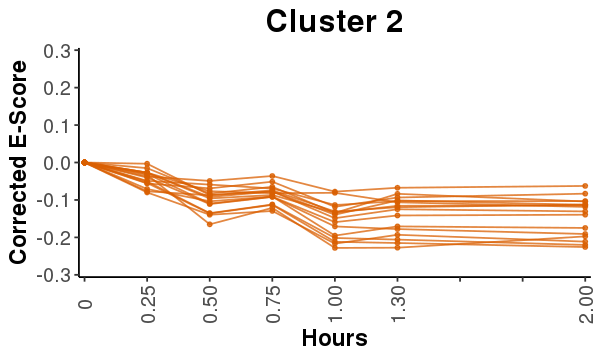

In [29]:
df_gather2 <- restructure_df(subset(T0_lps_auc_donor2_short_cluster2, cluster == 2),
                              colname_final_plot , level_final_plot)


########################################################
########Now plotting the clusters as line plots#########
########################################################

cluster_plt2 <- ggplot(data=df_gather2, aes(x=keys, y=(val), group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#D95F02', alpha=0.75)+  
                    geom_point(size=1, colour='#D95F02', alpha=0.79)+ 
                    labs(title = "Cluster 2",
                         x = "Hours", y = "Corrected E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=limits_final_plot,
                                     labels=labels_final_plot,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

cluster_plt2

In [30]:
subset(lps_auc_donor2_short_cluster, cluster == 2)

,Escore-00hr00mindonor2_00hr15mindonor2_TFEA.txt,Escore-00hr00mindonor2_00hr30mindonor2_TFEA.txt,Escore-00hr00mindonor2_00hr45mindonor2_TFEA.txt,Escore-00hr00mindonor2_01hr00mindonor2_TFEA.txt,Escore-00hr00mindonor2_01hr20mindonor2_TFEA.txt,Escore-00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FOXI1_HUMAN.H11MO.0.B,-0.027387611,-0.09590654,-0.08676247,-0.13413629,-0.11565047,-0.11472405,2
FOXJ3_HUMAN.H11MO.0.A,-0.049142218,-0.05896413,-0.06940213,-0.11350542,-0.10305197,-0.10317956,2
KAISO_HUMAN.H11MO.0.A,-0.032873225,-0.16510257,-0.12117692,-0.22812786,-0.22751991,-0.19732560,2
NFYB_HUMAN.H11MO.0.A,-0.003285032,-0.08687608,-0.07741591,-0.14876142,-0.12489234,-0.13062227,2
NRF1_HUMAN.H11MO.0.A,-0.030475898,-0.10959142,-0.09139671,-0.15921132,-0.14143925,-0.13943758,2
RFX2_HUMAN.H11MO.0.A,-0.027129133,-0.07666281,-0.08193253,-0.08094931,-0.10627873,-0.11860184,2
SP4_HUMAN.H11MO.0.A,-0.037307310,-0.04921462,-0.03600204,-0.07779754,-0.06745694,-0.06261046,2
TAF1_HUMAN.H11MO.0.A,-0.076986420,-0.08750609,-0.07433662,-0.13093644,-0.11941048,-0.11232754,2
THA11_HUMAN.H11MO.0.B,-0.054790817,-0.13615022,-0.11300320,-0.21179142,-0.21501215,-0.22577162,2


In [60]:
cluster2_table <- subset(lps_auc_donor2_short_cluster, cluster == 2)
write.table(cluster2_table, file = "./data/lps_processed_data/cluster2_results.txt", 
            append = FALSE,quote = FALSE, 
            sep = "\t", row.names = TRUE,
            col.names = TRUE)

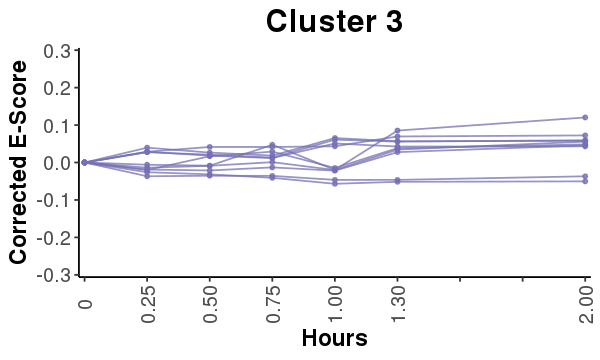

In [31]:
df_gather3 <- restructure_df(subset(T0_lps_auc_donor2_short_cluster2, cluster == 3),
                              colname_final_plot , level_final_plot)


########################################################
########Now plotting the clusters as line plots#########
########################################################

cluster_plt3 <- ggplot(data=df_gather3, aes(x=keys, y=(val), group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#7570B3', alpha=0.75)+  
                    geom_point(size=1, colour='#7570B3', alpha=0.79)+ 
                    labs(title = "Cluster 3",
                         x = "Hours", y = "Corrected E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=limits_final_plot,
                                     labels=labels_final_plot,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

cluster_plt3

In [32]:
subset(lps_auc_donor2_short_cluster, cluster == 3)

,Escore-00hr00mindonor2_00hr15mindonor2_TFEA.txt,Escore-00hr00mindonor2_00hr30mindonor2_TFEA.txt,Escore-00hr00mindonor2_00hr45mindonor2_TFEA.txt,Escore-00hr00mindonor2_01hr00mindonor2_TFEA.txt,Escore-00hr00mindonor2_01hr20mindonor2_TFEA.txt,Escore-00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
EGR1_HUMAN.H11MO.0.A,-0.036740415,-0.035324514,-0.0356552128,-0.04645862,-0.04634549,-0.03683607,3
IRF2_HUMAN.H11MO.0.A,-0.013927867,-0.008782897,0.0009661532,-0.02008563,0.03453577,0.05571094,3
IRF7_HUMAN.H11MO.0.C,-0.019990166,0.016742822,0.0290096367,-0.01467477,0.03830959,0.04841433,3
IRF8_HUMAN.H11MO.0.B,0.028751080,0.041561422,0.0414649473,0.04332581,0.06954692,0.07234948,3
IRF9_HUMAN.H11MO.0.C,-0.005951465,-0.008560722,0.0474301550,-0.01972806,0.08532467,0.12034739,3
PAX5_HUMAN.H11MO.0.A,0.039642688,0.026470628,0.0183292536,0.06538942,0.05664844,0.05775519,3
PRDM6_HUMAN.H11MO.0.C,-0.025917806,-0.031689259,-0.0409277522,-0.05682407,-0.05153220,-0.05035366,3
STAT2_HUMAN.H11MO.0.A,-0.018755969,-0.021286900,-0.0130047827,-0.02188897,0.02771303,0.04595624,3
ZN121_HUMAN.H11MO.0.C,0.028727395,0.018226563,0.0118159667,0.05085194,0.04267989,0.04305410,3


In [61]:
cluster3_table <- subset(lps_auc_donor2_short_cluster, cluster == 3)
write.table(cluster3_table, file = "./data/lps_processed_data/cluster3_results.txt", 
            append = FALSE,quote = FALSE, 
            sep = "\t", row.names = TRUE,
            col.names = TRUE)


In [33]:
ggsave("./figures/cluster1_Escores.pdf", cluster_plt1, width = 5, height = 4)
ggsave("./figures/cluster2_Escores.pdf", cluster_plt2, width = 5, height = 4)
ggsave("./figures/cluster3_Escores.pdf", cluster_plt3, width = 5, height = 4)

### Plotting the time-series based on the three clusters

In [34]:
T0_lps_auc_donor2 <- data.frame(T0 =(rep(0, nrow(lps_auc_donor2))),
                                              lps_auc_donor2)
head(T0_lps_auc_donor2)

,T0,Escore.00hr00mindonor2_00hr15mindonor2_TFEA.txt,Escore.00hr00mindonor2_00hr30mindonor2_TFEA.txt,Escore.00hr00mindonor2_00hr45mindonor2_TFEA.txt,Escore.00hr00mindonor2_01hr00mindonor2_TFEA.txt,Escore.00hr00mindonor2_01hr20mindonor2_TFEA.txt,Escore.00hr00mindonor2_02hr00mindonor2_TFEA.txt,Escore.00hr00mindonor2_02hr30mindonor2_TFEA.txt,Escore.00hr00mindonor2_03hr00mindonor2_TFEA.txt,Escore.00hr00mindonor2_03hr30mindonor2_TFEA.txt,⋯,Escore.00hr00mindonor2_10hrdonor2_TFEA.txt,Escore.00hr00mindonor2_12hrdonor2_TFEA.txt,Escore.00hr00mindonor2_14hrdonor2_TFEA.txt,Escore.00hr00mindonor2_16hrdonor2_TFEA.txt,Escore.00hr00mindonor2_18hrdonor2_TFEA.txt,Escore.00hr00mindonor2_20hrdonor2_TFEA.txt,Escore.00hr00mindonor2_22hrdonor2_TFEA.txt,Escore.00hr00mindonor2_24hrdonor2_TFEA.txt,Escore.00hr00mindonor2_36hrdonor2_TFEA.txt,Escore.00hr00mindonor2_48hrdonor2_TFEA.txt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AHR_HUMAN.H11MO.0.B,0,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.00000000
AIRE_HUMAN.H11MO.0.C,0,-0.019216165,-0.02855690,-0.01036687,0.02329485,0.020730800,0.04087016,0.02686430,0.04414118,0.04916016,⋯,0.030667139,0.005433083,0.022762191,0.01492084,-0.013460384,-0.028876716,-0.01371261,-0.013864433,-0.034031096,-0.04276269
ALX1_HUMAN.H11MO.0.B,0,0.018595453,0.03859200,0.03509176,-0.02176768,-0.007170636,-0.02329002,-0.04698456,-0.03550442,-0.01331934,⋯,-0.076009487,-0.023750909,-0.026643392,-0.01234907,-0.032158125,-0.004845907,-0.01579895,-0.021796724,0.005000482,-0.03845620
ANDR_HUMAN.H11MO.0.A,0,-0.010267568,-0.02643724,-0.03878098,-0.03991769,-0.031231619,-0.02421425,-0.02126569,-0.02013686,-0.02801894,⋯,-0.002977178,-0.007498418,-0.009037852,-0.01785580,-0.009729884,-0.014180472,-0.01030204,-0.005514023,-0.007207210,-0.01154160
AP2A_HUMAN.H11MO.0.A,0,0.007351198,0.07172315,0.06563050,0.12371281,0.092980704,0.10862374,0.12303767,0.10520069,0.06309733,⋯,0.066509038,0.076532542,0.059739270,0.01756333,0.045975741,-0.003901631,0.05348265,0.039797685,0.034979301,0.03749480
AP2B_HUMAN.H11MO.0.B,0,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.00000000


In [35]:
lps_auc_donor2_cluster1 <- T0_lps_auc_donor2[rownames(T0_lps_auc_donor2) %in%
                                         rownames(subset(T0_lps_auc_donor2_short_cluster2, cluster == 1)),]

lps_auc_donor2_cluster2 <- T0_lps_auc_donor2[rownames(T0_lps_auc_donor2) %in%
                                         rownames(subset(T0_lps_auc_donor2_short_cluster2, cluster == 2)),]

lps_auc_donor2_cluster3 <- T0_lps_auc_donor2[rownames(T0_lps_auc_donor2) %in%
                                         rownames(subset(T0_lps_auc_donor2_short_cluster2, cluster == 3)),]

In [36]:
restructure_df_all <- function(df, cols, levels){
    
    ##no need to remove last column
    df$TF <- rownames(df)
    colnames(df) <- cols
    
    df_gather <- df %>% gather("key","val", setdiff(names(.), "TF"))
    
    ##specify the factors for ordering the variables
    df_gather$keys <- factor(df_gather$key,
                           levels=levels)
    return(df_gather)
}

In [37]:
#################################################
##create brakes for donor2 with all time points ##
##################################################

T0colname_days2 <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                   "T0_1hr20min","T0_2hr00min","T0_2hr30min","T0_3hr00min",
                   "T0_3hr30min","T0_4hr00min","T0_5hr00min","T0_8hr00min",
                   "T0_10hr00min","T0_12hr00min","T0_14hr00min","T0_16hr00min",
                   "T0_18hr00min","T0_20hr00min","T0_22hr00min","T0_24hr00min",
                   "T0_36hr00min","T0_48hr00min","TF")

T0level_days2 <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","T0_2hr00m#in","T0_2hr30min","T0_3hr00min",
                 "T0_3hr30min","T0_4hr00min","T0_5hr00min","T0_8hr00min",
                 "T0_10hr00min","T0_12hr00min","T0_14hr00min","T0_16hr00min",
                 "T0_18hr00min","T0_20hr00min","T0_22hr00min","T0_24hr00min",
                 "T0_36hr00min","T0_48hr00min")

T0plot_limits2 <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","z1","T0_2hr00min","z2","T0_2hr30min","z3","T0_3hr00min",
                 "z4","T0_3hr30min","z5","T0_4hr00min","zz1","zz2","T0_5hr00min","zz3","zz4",
                  "T0_8hr00min","zz4","zz5","T0_10hr00min","zz6","zz7","T0_12hr00min","zz8","zz9",
                  "T0_14hr00min","zz10","zz11","T0_16hr00min","zz12","zz13",
                 "T0_18hr00min","zz14","zz15","T0_20hr00min","zz16","zz17",
                  "T0_22hr00min","zz18","zz19","T0_24hr00min","zzz1","zzz2","zzz3","zzz4",
                 "T0_36hr00min","zzz5","zzz6","zzz7","zzz8","T0_48hr00min")


T0plot_labels2 <- c("T0","T0 vs 0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min"," ","T0_2hr00min"," ","T0_2hr30min"," ","T0_3hr00min",
                 " ","T0_3hr30min"," ","T0_4hr00min"," "," ","T0_5hr00min"," "," ",
                  "T0_8hr00min"," "," ","T0_10hr00min"," "," ","T0_12hr00min"," "," ",
                  "T0_14hr00min"," "," ","T0_16hr00min"," "," ",
                 "T0_18hr00min"," "," ","T0_20hr00min"," "," ",
                  "T0_22hr00min"," "," ","T0_24hr00min"," "," "," "," ",
                 "T0_36hr00min"," "," "," "," ","T0_48hr00min")

In [38]:
all_df_gather1 <- restructure_df_all(lps_auc_donor2_cluster1, T0colname_days2, T0level_days2)

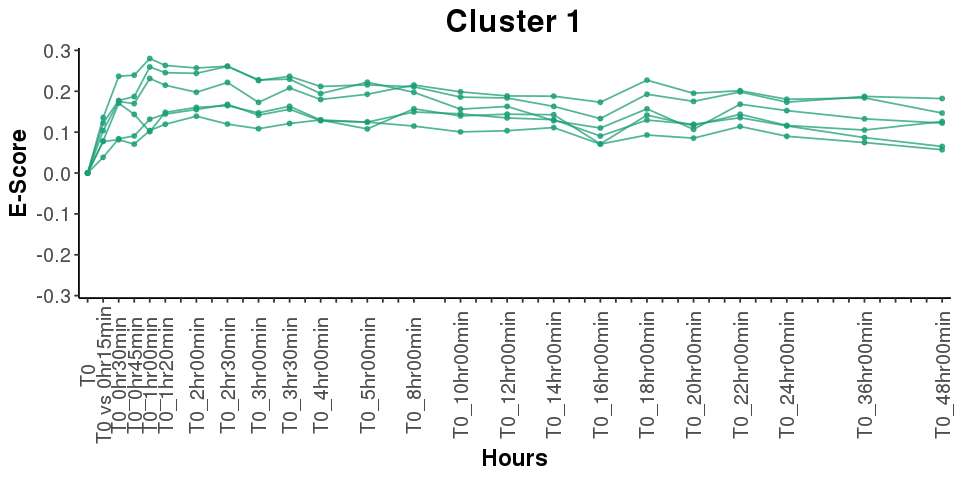

In [39]:
options(repr.plot.width=8, repr.plot.height=4)


    
########################################################
########Now plotting the clusters as line plots#########
########################################################

all_cluster_plt1 <- ggplot(data=all_df_gather1, aes(x=keys, y=(val), group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#1B9E77', alpha=0.75)+  
                    geom_point(size=1, colour='#1B9E77', alpha=0.79)+ 
                    labs(title = "Cluster 1",
                         x = "Hours", y = "E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=T0plot_limits2,
                                     labels=T0plot_labels2,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

all_cluster_plt1

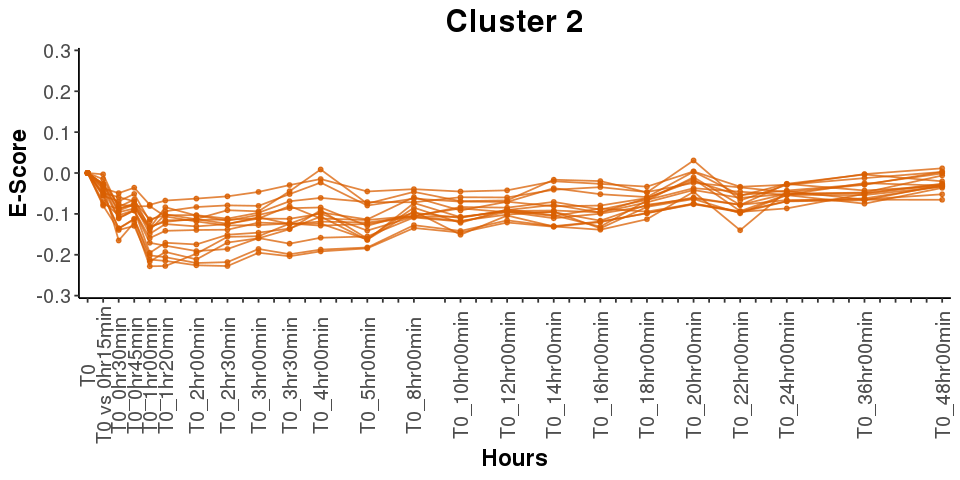

In [40]:
options(repr.plot.width=8, repr.plot.height=4)

all_df_gather2 <- restructure_df_all(lps_auc_donor2_cluster2, T0colname_days2, T0level_days2)

    
########################################################
########Now plotting the clusters as line plots#########
########################################################

all_cluster_plt2 <- ggplot(data=all_df_gather2, aes(x=keys, y=(val), group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#D95F02', alpha=0.75)+  
                    geom_point(size=1, colour='#D95F02', alpha=0.79)+ 
                    labs(title = "Cluster 2",
                         x = "Hours", y = "E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=T0plot_limits2,
                                     labels=T0plot_labels2,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

all_cluster_plt2

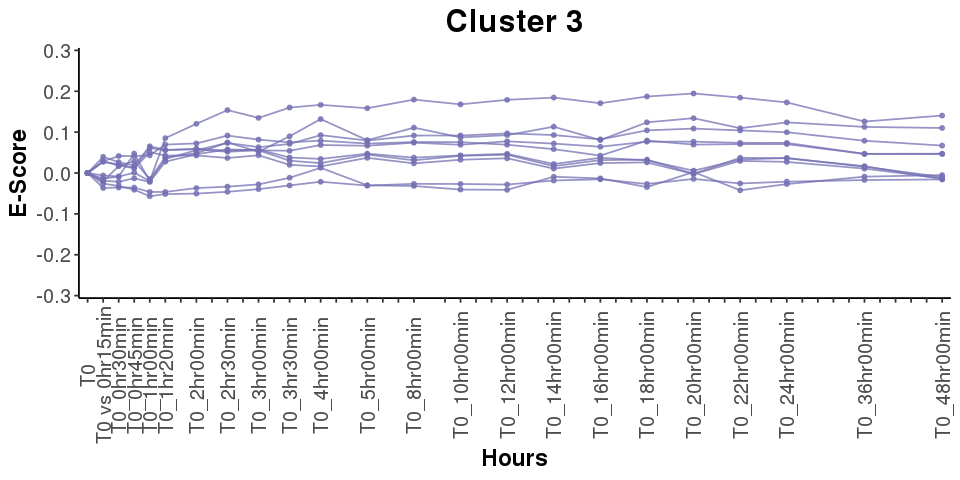

In [41]:
options(repr.plot.width=8, repr.plot.height=4)

all_df_gather3 <- restructure_df_all(lps_auc_donor2_cluster3, T0colname_days2, T0level_days2)

    
########################################################
########Now plotting the clusters as line plots#########
########################################################

all_cluster_plt3 <- ggplot(data=all_df_gather3, aes(x=keys, y=(val), group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#7570B3', alpha=0.75)+  
                    geom_point(size=1, colour='#7570B3', alpha=0.79)+ 
                    labs(title = "Cluster 3",
                         x = "Hours", y = "E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=T0plot_limits2,
                                     labels=T0plot_labels2,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

all_cluster_plt3

In [42]:
##add a cluster column
lps_auc_donor2_cluster1$cluster <- rep("cluster 1", nrow(lps_auc_donor2_cluster1))
lps_auc_donor2_cluster2$cluster <- rep("cluster 2", nrow(lps_auc_donor2_cluster2))
lps_auc_donor2_cluster3$cluster <- rep("cluster 3", nrow(lps_auc_donor2_cluster3))

##merge the clusters
master_list <- rbind(lps_auc_donor2_cluster1, 
                     lps_auc_donor2_cluster2, 
                     lps_auc_donor2_cluster3)

##no need to remove last column
master_list$TF <- rownames(master_list)
colnames(master_list) <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                   "T0_1hr20min","T0_2hr00min","T0_2hr30min","T0_3hr00min",
                   "T0_3hr30min","T0_4hr00min","T0_5hr00min","T0_8hr00min",
                   "T0_10hr00min","T0_12hr00min","T0_14hr00min","T0_16hr00min",
                   "T0_18hr00min","T0_20hr00min","T0_22hr00min","T0_24hr00min",
                   "T0_36hr00min","T0_48hr00min","cluster","TF")

In [43]:
master_list_gather <- master_list %>% gather("key","val", -c(TF, cluster))

In [44]:
##specify the factors for ordering the variables
master_list_gather$keys <- factor(master_list_gather$key,
                       levels=T0level_days2)

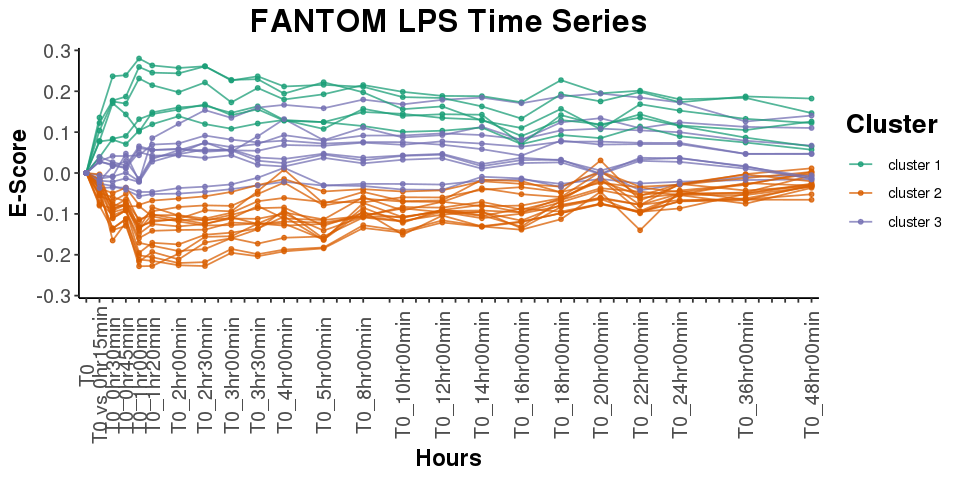

In [45]:
########################################################
########Now plotting the clusters as line plots#########
########################################################

all_clusters <- ggplot(data=master_list_gather, aes(x=keys, y=(val), group=TF, color=cluster)) +
                    geom_line(linetype = "solid",size=0.5, alpha=0.75)+  
                    geom_point(size=1, alpha=0.79)+ 
                    scale_color_brewer(name = "Cluster", palette="Dark2") +
                    labs(title = "FANTOM LPS Time Series",
                         x = "Hours", y = "E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=T0plot_limits2,
                                     labels=T0plot_labels2,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

all_clusters

In [46]:
T0plot_labels <- c("0","0.25","0.50","0.75","1.00",
                 "1.30"," ","2.00"," ","2.50"," ","3.00",
                 " ","3.50"," ","4.00"," "," ","5.00"," "," ",
                  "8.00"," "," ","10.00"," "," ","12.00"," "," ",
                  "14.00"," "," ","16.00"," "," ",
                 "18.00"," "," ","20.00"," "," ",
                  "22.00"," "," ","24.00"," "," "," "," ",
                 "36.00"," "," "," "," ","48.00")

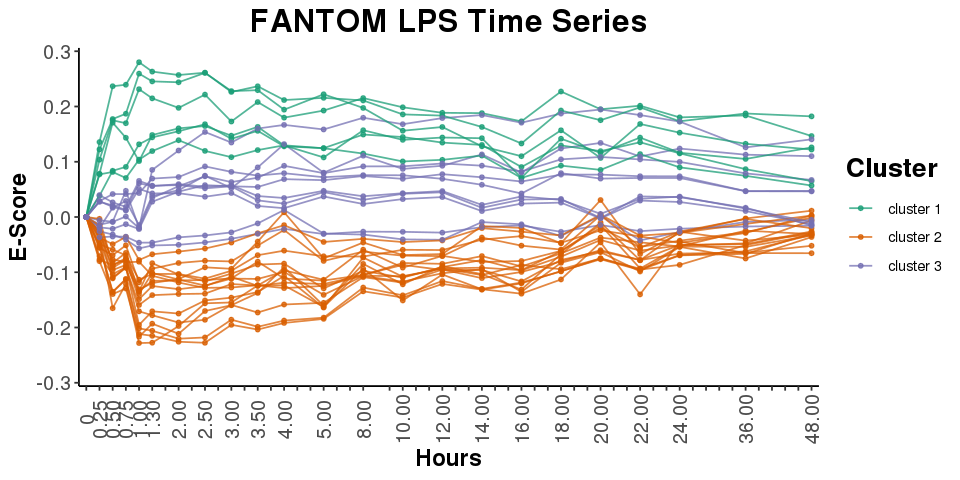

In [47]:
########################################################
########Now plotting the clusters as line plots#########
########################################################

all_clusters2 <- ggplot(data=master_list_gather, aes(x=keys, y=(val), group=TF, color=cluster)) +
                    geom_line(linetype = "solid",size=0.5, alpha=0.75)+  
                    geom_point(size=1, alpha=0.79)+ 
                    scale_color_brewer(name = "Cluster", palette="Dark2") +
                    labs(title = "FANTOM LPS Time Series",
                         x = "Hours", y = "E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=T0plot_limits2,
                                     labels=T0plot_labels,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

all_clusters2

In [48]:
##These are the 5 TFs with E-score greater than 0.05 at 48hrs
subset(master_list, T0_48hr00min > 0.03 )

,T0,T0_0hr15min,T0_0hr30min,T0_0hr45min,T0_1hr00min,T0_1hr20min,T0_2hr00min,T0_2hr30min,T0_3hr00min,T0_3hr30min,⋯,T0_14hr00min,T0_16hr00min,T0_18hr00min,T0_20hr00min,T0_22hr00min,T0_24hr00min,T0_36hr00min,T0_48hr00min,cluster,TF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NFKB1_HUMAN.H11MO.1.B,0,0.122318921,0.177343978,0.1869130317,0.25946299,0.24545134,0.24385063,0.26095309,0.22787381,0.22955410,⋯,0.12796124,0.11004065,0.15692213,0.10681915,0.16832217,0.15259132,0.13251127,0.12213490,cluster 1,NFKB1_HUMAN.H11MO.1.B
NFKB2_HUMAN.H11MO.0.B,0,0.077172659,0.081493255,0.0705826871,0.10381796,0.11929325,0.13895466,0.11967323,0.10831279,0.12111130,⋯,0.11117077,0.07064908,0.09298430,0.08529187,0.11384377,0.08986876,0.07454655,0.05691884,cluster 1,NFKB2_HUMAN.H11MO.0.B
REL_HUMAN.H11MO.0.B,0,0.038475463,0.083695423,0.0907107905,0.13162373,0.14416252,0.15521892,0.16793840,0.14153737,0.15593836,⋯,0.13049749,0.09048190,0.12956426,0.11921767,0.13531227,0.11516470,0.08658965,0.06487039,cluster 1,REL_HUMAN.H11MO.0.B
RELB_HUMAN.H11MO.0.C,0,0.103726210,0.175030250,0.1697505250,0.23131641,0.21477379,0.19754341,0.22150843,0.17283439,0.20803558,⋯,0.18798450,0.17311029,0.22714112,0.19501809,0.20137248,0.18029920,0.18383283,0.14658057,cluster 1,RELB_HUMAN.H11MO.0.C
TAL1_HUMAN.H11MO.0.A,0,0.078412610,0.170780539,0.1434090598,0.10119202,0.14840790,0.16044878,0.16468300,0.14717642,0.16316640,⋯,0.14257701,0.07114834,0.14167457,0.11597285,0.14369624,0.11626982,0.10506720,0.12600581,cluster 1,TAL1_HUMAN.H11MO.0.A
TF65_HUMAN.H11MO.0.A,0,0.135637734,0.236649509,0.2393831887,0.28011771,0.26315439,0.25698058,0.26116490,0.22635712,0.23656237,⋯,0.16293491,0.13308722,0.19273576,0.17521930,0.19836550,0.17322238,0.18734111,0.18215858,cluster 1,TF65_HUMAN.H11MO.0.A
IRF2_HUMAN.H11MO.0.A,0,-0.013927867,-0.008782897,0.0009661532,-0.02008563,0.03453577,0.05571094,0.07367784,0.06321059,0.07111083,⋯,0.09289493,0.08223603,0.10433663,0.10865241,0.10419236,0.09976682,0.07891705,0.06709896,cluster 3,IRF2_HUMAN.H11MO.0.A
IRF7_HUMAN.H11MO.0.C,0,-0.019990166,0.016742822,0.0290096367,-0.01467477,0.03830959,0.04841433,0.07474905,0.05201032,0.08979250,⋯,0.11327378,0.08049841,0.12398591,0.13410229,0.10951565,0.12388067,0.11279290,0.11015164,cluster 3,IRF7_HUMAN.H11MO.0.C
IRF8_HUMAN.H11MO.0.B,0,0.028751080,0.041561422,0.0414649473,0.04332581,0.06954692,0.07234948,0.09157583,0.08166553,0.07493936,⋯,0.05834265,0.04256163,0.07936182,0.06951051,0.07067533,0.07065233,0.04664844,0.04641768,cluster 3,IRF8_HUMAN.H11MO.0.B


In [49]:
ggsave("./figures/all_clusters_Escores.pdf", all_clusters2, width = 7, height = 4)

### Principle Component Analysis of the LPS data

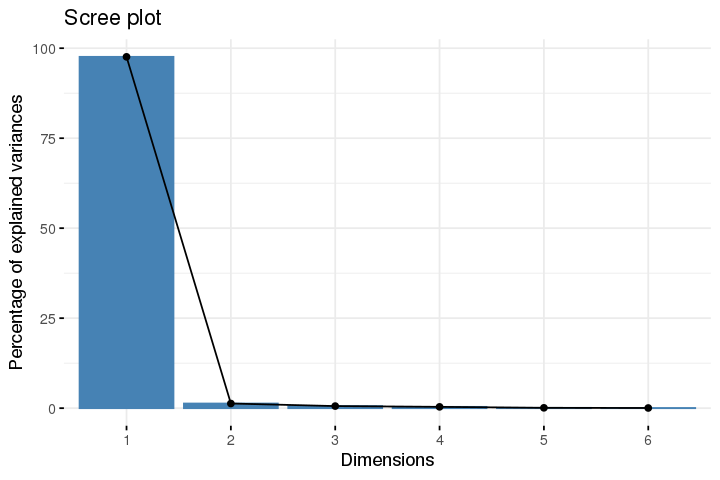

In [50]:
options(repr.plot.width=5, repr.plot.height=3)

##PCA for all samples
pc0 <- prcomp(lps_auc_donor2_short)

options(repr.plot.width=6, repr.plot.height=4)
fviz_eig(pc0)

In [51]:
#################################
##Percent of variance explained##
#################################
eigs <- pc0$sdev^2
(eigs[1] / sum(eigs))*100
(eigs[2] / sum(eigs))*100
(eigs[3] / sum(eigs))*100
(eigs[4] / sum(eigs))*100

[1] 97.60126

[1] 1.295955

[1] 0.5845107

[1] 0.3671412

In [52]:
pc_df0 <- as.data.frame(pc0$x[, 1])
colnames(pc_df0) <- "PC1"
pc_df0$PC2 <-  pc0$x[, 2]
pc_df0$PC3 <-  pc0$x[, 3]
pc_df0$PC4 <-  pc0$x[, 4]


In [53]:
cluster_info <- lps_auc_donor2_short_cluster[c(7)]

In [54]:
pc_df <- merge(pc_df0, cluster_info, by="row.names")

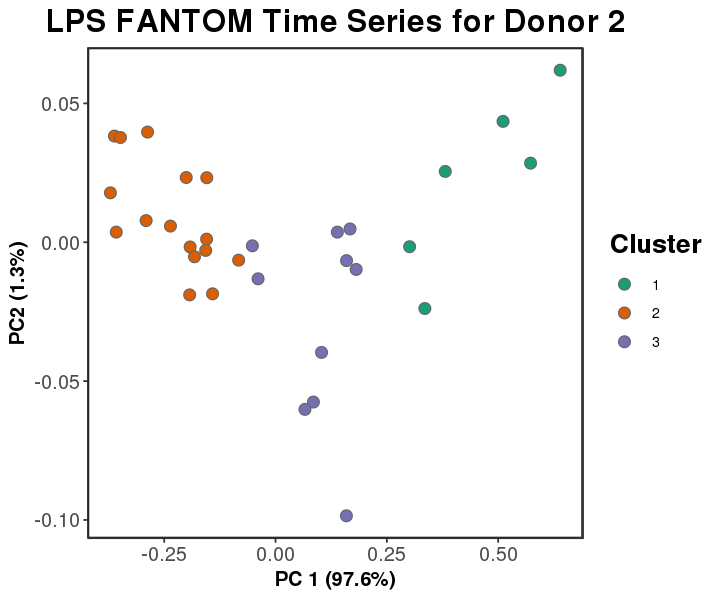

In [55]:
options(repr.plot.width=6, repr.plot.height=5)
pca_clusters <- ggplot(pc_df, aes(PC1, PC2, fill=as.factor(cluster))) +
                xlab("PC 1 (97.6%)") + ylab("PC2 (1.3%)") +
                ggtitle("LPS FANTOM Time Series for Donor 2") +
                    geom_point(size=3, shape=21, color="gray40") + theme_bw() +
                    scale_fill_brewer(name = "Cluster", palette="Dark2")+
                    theme(panel.grid.major = element_blank(), 
                          panel.grid.minor = element_blank(),
                          panel.background = element_rect(colour = "black", size=0.75))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 12,face = "bold"), 
                          axis.text = element_text(size = 12))

pca_clusters

In [56]:
ggsave("./figures/pca_clusters_0hrs_to_2hrs.pdf", pca_clusters, width = 6, height = 5)